In [2]:
import pandas as pd
import numpy as np

In [3]:
LendingData = pd.read_csv('../data/loan.csv', low_memory = False)

In [4]:
lenddf = LendingData.copy()

In [344]:
LendingData.dtypes.head()

id                   int64
member_id            int64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
dtype: object

In [5]:
LendingData.head(5)
#LendingData.columns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(LendingData.info())
print('----FUNDED AMOUNT-----\n',LendingData['funded_amnt'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [7]:
LendingData.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299271,11,6,3,103,10,2,...,63144,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [8]:
(LendingData.isnull().sum()/len(LendingData))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.799326
emp_length                      5.051393
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           85.797726
purpose                         0.000000
title                           0.017129
zip_code                        0.000000
addr_state                      0.000000
dti             

In [37]:
LendingData['emp_length'].value_counts(dropna=False)

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
NaN           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

Dropping columns with more than 75% missing values

In [9]:
lenddf.drop(columns=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il',
          'mths_since_rcnt_il', 'open_il_24m','open_il_12m','open_il_6m', 'open_acc_6m','verification_status_joint','dti_joint',
          'annual_inc_joint','mths_since_last_major_derog','mths_since_last_record','desc'], inplace = True)

In [10]:
lenddf.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      51462
emp_length                     44825
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                            152
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
m

In [11]:
lenddf['title'].isnull().sum()

152

Handling missing values for emp_length column

Replacing the NaN values with 0 and removing special characters and strings to store the data as int type

In [12]:
lenddf['emp_length'] = lenddf['emp_length'].str.replace('years','').str.replace('year','').str.replace('+','').str.replace('<','').str.replace(' ','')
lenddf['emp_length'].fillna(0, inplace = True)
lenddf['emp_length'].value_counts(dropna = False)

10    291569
1     127700
2      78870
3      70026
5      55704
4      52529
0      44825
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

Converting the annual income column as int type and replacing the missing annual income with zeroes

In [13]:
lenddf['annual_inc'].fillna(0, inplace = True)
lenddf['annual_inc'] = lenddf['annual_inc'].astype(int)

In [14]:
lenddf = lenddf.dropna(axis = 0, subset = ['delinq_2yrs'])

Dropping columns not related to interest rate 

In [15]:
lenddf.drop(columns=['emp_title', 'title', 'mths_since_last_delinq', 'revol_util', 'last_pymnt_d','next_pymnt_d', 
                     'last_credit_pull_d', 'collections_12_mths_ex_med', 'tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], inplace = True)

In [16]:
# Dropping rows where the earliest_cr_line and inq_last_6mths are null () -> 0.003268% values missing
lenddf = lenddf.dropna(axis = 0, subset = ['earliest_cr_line'])
lenddf = lenddf.dropna(axis = 0, subset = ['inq_last_6mths'])

In [17]:
lenddf.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

In [18]:
lenddf.dtypes

id                           int64
member_id                    int64
loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                   int32
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                float64
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
total_acc           

In [19]:
lenddf['term'] = lenddf['term'].str.replace('months','').str.replace(' ','')
lenddf['term'] = lenddf['term'].astype(int)
lenddf['emp_length'] = lenddf['emp_length'].astype(int)

In [20]:
lenddf.corr(method ='pearson')
lenddf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,0.0
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0.0
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0.0
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,INDIVIDUAL,0.0


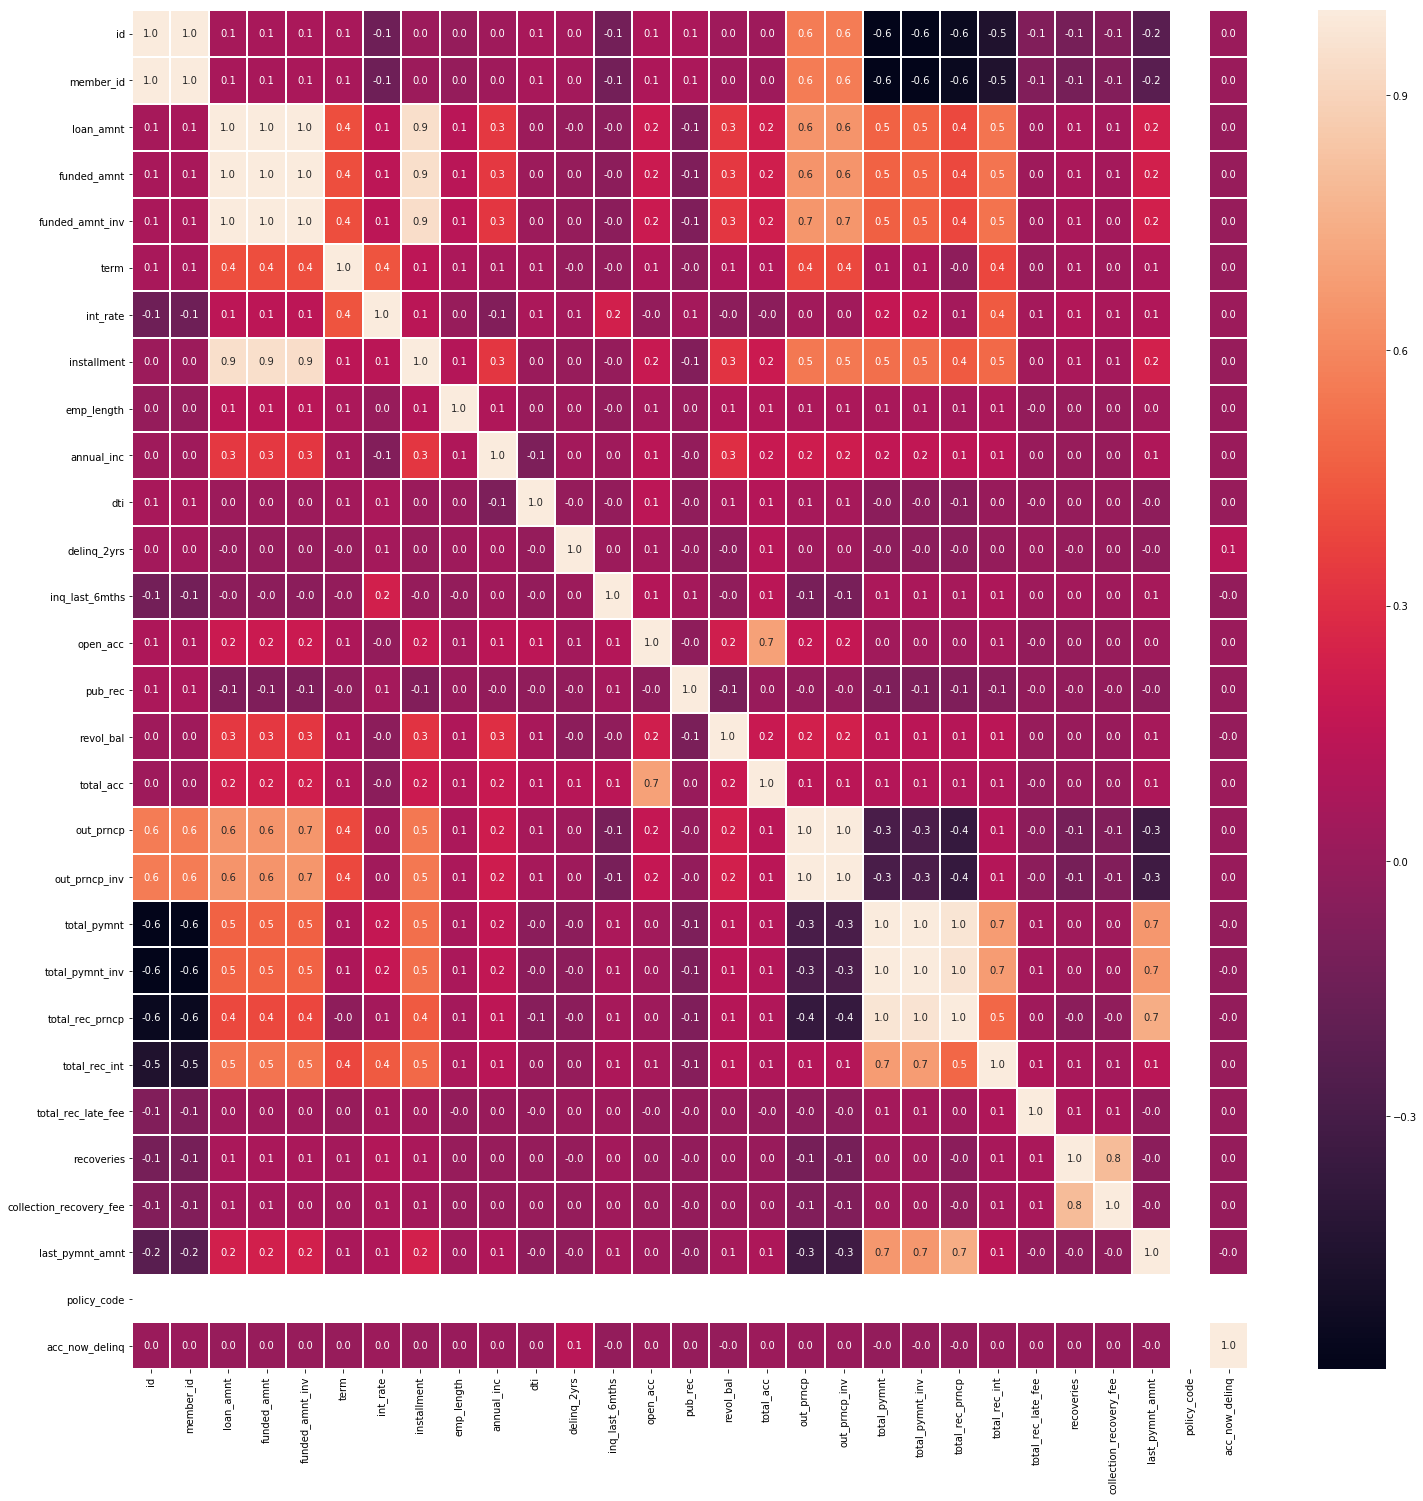

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(lenddf.corr(), annot = True, linewidths = 1, fmt = '.1f', ax=ax)
plt.show()
%matplotlib inline

Dropping the correlated columns in the below code:

In [23]:
lenddf.drop(columns = {'funded_amnt','funded_amnt_inv','out_prncp_inv','total_rec_prncp',
                      'collection_recovery_fee','loan_status','pymnt_plan','url','zip_code','earliest_cr_line','inq_last_6mths','pub_rec',
                       'revol_bal','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','policy_code','last_pymnt_amnt'}, inplace = True)
lenddf.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,open_acc,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,application_type,acc_now_delinq
0,1077501,1296599,5000.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,0.0,3.0,9.0,f,0.0,5861.071414,5831.78,INDIVIDUAL,0.0
1,1077430,1314167,2500.0,60,15.27,59.83,C,C4,1,RENT,...,1.00,0.0,3.0,4.0,f,0.0,1008.710000,1008.71,INDIVIDUAL,0.0
2,1077175,1313524,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,0.0,2.0,10.0,f,0.0,3003.653644,3003.65,INDIVIDUAL,0.0
3,1076863,1277178,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,0.0,10.0,37.0,f,0.0,12226.302212,12226.30,INDIVIDUAL,0.0
4,1075358,1311748,3000.0,60,12.69,67.79,B,B5,1,RENT,...,17.94,0.0,15.0,38.0,f,766.9,3242.170000,3242.17,INDIVIDUAL,0.0


In [24]:
lenddf.drop(columns = {'id','member_id','grade'}, inplace = True)
lenddf.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dti,delinq_2yrs,open_acc,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,application_type,acc_now_delinq
0,5000.0,36,10.65,162.87,B2,10,RENT,24000,Verified,Dec-2011,...,27.65,0.0,3.0,9.0,f,0.0,5861.071414,5831.78,INDIVIDUAL,0.0
1,2500.0,60,15.27,59.83,C4,1,RENT,30000,Source Verified,Dec-2011,...,1.00,0.0,3.0,4.0,f,0.0,1008.710000,1008.71,INDIVIDUAL,0.0
2,2400.0,36,15.96,84.33,C5,10,RENT,12252,Not Verified,Dec-2011,...,8.72,0.0,2.0,10.0,f,0.0,3003.653644,3003.65,INDIVIDUAL,0.0
3,10000.0,36,13.49,339.31,C1,10,RENT,49200,Source Verified,Dec-2011,...,20.00,0.0,10.0,37.0,f,0.0,12226.302212,12226.30,INDIVIDUAL,0.0
4,3000.0,60,12.69,67.79,B5,1,RENT,80000,Source Verified,Dec-2011,...,17.94,0.0,15.0,38.0,f,766.9,3242.170000,3242.17,INDIVIDUAL,0.0


Converting the categorical columns to numerical columns using One Hot Encoder

In [25]:
lenddf = pd.get_dummies(lenddf, columns =['home_ownership','initial_list_status','application_type'], prefix = ['OwnerOf', 'List_Status','Application'], drop_first = True)

In [26]:
lenddf = pd.get_dummies(lenddf, columns =['verification_status','purpose'], prefix = ['verification_status', 'purpose'], drop_first = True)
lenddf.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,addr_state,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,B2,10,24000,Dec-2011,AZ,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,C4,1,30000,Dec-2011,GA,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,C5,10,12252,Dec-2011,IL,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,C1,10,49200,Dec-2011,CA,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,60,12.69,67.79,B5,1,80000,Dec-2011,OR,17.94,...,0,0,0,0,0,1,0,0,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
lenddf['sub_grade'] = labelencoder.fit_transform(lenddf['sub_grade'])
lenddf.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,addr_state,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,6,10,24000,Dec-2011,AZ,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,13,1,30000,Dec-2011,GA,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,14,10,12252,Dec-2011,IL,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,10,10,49200,Dec-2011,CA,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,60,12.69,67.79,9,1,80000,Dec-2011,OR,17.94,...,0,0,0,0,0,1,0,0,0,0


In [28]:
lenddf.drop(columns = {'addr_state'}, inplace = True)
lenddf.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,6,10,24000,Dec-2011,27.65,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,13,1,30000,Dec-2011,1.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,14,10,12252,Dec-2011,8.72,0.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,10,10,49200,Dec-2011,20.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,60,12.69,67.79,9,1,80000,Dec-2011,17.94,0.0,...,0,0,0,0,0,1,0,0,0,0


(array([ 48821., 136684., 165817., 123986., 118275., 112913.,  51364.,
         55561.,  27773.,  46156.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

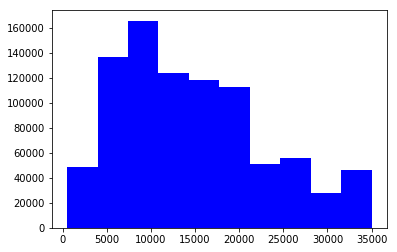

In [69]:
plt.hist(lenddf['loan_amnt'],histtype='bar', align='mid', color='blue', label=None, stacked=False, normed=None,data=lenddf)

In [66]:
lenddf.to_csv('FeatureEnggToDo.csv')

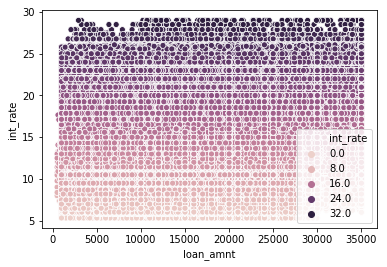

In [95]:
import seaborn as sns
sns.scatterplot( x="loan_amnt", y="int_rate", data= lenddf, hue='int_rate', legend= 'brief')
plt.legend(loc='lower right')

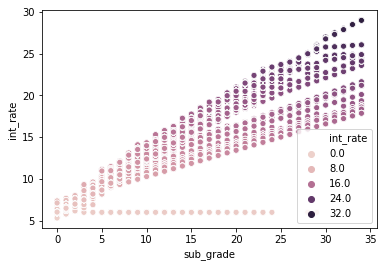

In [96]:
sns.scatterplot( x="sub_grade", y="int_rate", data= lenddf, hue='int_rate', legend= 'brief')
plt.legend(loc='lower right')